### COMPARING DATASETS

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# defining stylesheet for all figures in notebook
plt.style.use('gstyle.mplstyle')
 
# to view all columns and names 
pd.options.display.max_columns = 90
pd.options.display.max_rows = 100

In [7]:
path = '../processed_data/all_processed.csv'
df = pd.read_csv(path)

df.head()

,zip,total population,ozone,ozone pctl,pm2.5,pm2.5 pctl,diesel pm,diesel pm pctl,pesticides,pesticides pctl,traffic,traffic pctl,cleanup sites,cleanup sites pctl,groundwater threats,groundwater threats pctl,haz. waste,haz. waste pctl,imp. water bodies,imp. water bodies pctl,solid waste,solid waste pctl,pollution burden,pollution burden score,asthma,asthma pctl,low birth weight,low birth weight pctl,education,education pctl,linguistic isolation,linguistic isolation pctl,poverty,poverty pctl,pop. char.,pop. char. score,ces_score,ces_per_range,year,census tract,county,drinking water,drinking water pctl,tox. release,tox. release pctl,pollution burden pctl,unemployment,unemployment pctl,pop. char. pctl,city,latitude,longitude,ces_per,cardiovascular disease,cardiovascular disease pctl,housing burden,housing burden pctl
0,93706,41087,0.177311,76.55,15.61,95.96,6.14,56.19,1120.30,90.59,388.7,37.64,195.0,97.58,301.0,93.43,4.825,84.99,0,0.00,12.0,84.91,73.4,7.3,132.40,98.95,9.10,95.94,47.6,94.22,16.9,79.82,70.6,96.91,90.4,9.0,66.30,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93307,82658,0.512336,93.70,19.40,99.69,9.57,64.73,7128.70,98.37,710.3,52.05,104.0,92.39,202.0,88.83,10.100,94.64,0,0.00,20.0,95.69,76.9,7.7,55.93,79.51,7.49,76.29,49.7,95.44,18.8,84.27,67.1,95.56,82.5,8.2,63.44,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,95205,38069,0.022790,38.53,12.51,71.65,18.95,80.50,94.20,72.24,1352.2,72.67,96.0,91.62,325.0,94.11,9.600,94.22,6,63.87,5.0,53.97,73.5,7.4,73.30,90.71,6.95,60.92,47.9,94.40,23.7,89.37,68.6,96.23,83.8,8.4,61.60,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93702,48607,0.317831,86.99,16.08,97.06,36.85,94.91,7.92,53.79,1070.1,65.38,56.0,82.80,73.0,65.47,1.275,48.13,0,0.00,2.0,28.97,66.4,6.6,93.50,95.32,8.40,91.26,55.4,97.38,22.4,87.97,73.5,97.72,90.1,9.0,59.83,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,90058,3223,0.015613,31.32,15.26,94.98,56.80,98.36,0.00,0.00,923.7,59.97,415.0,99.83,178.0,86.73,58.775,100.00,7,71.67,34.0,99.22,71.9,7.2,57.20,80.80,7.34,72.00,69.6,99.70,37.9,97.69,90.5,99.88,82.2,8.2,59.08,96-100% (highest scores),2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


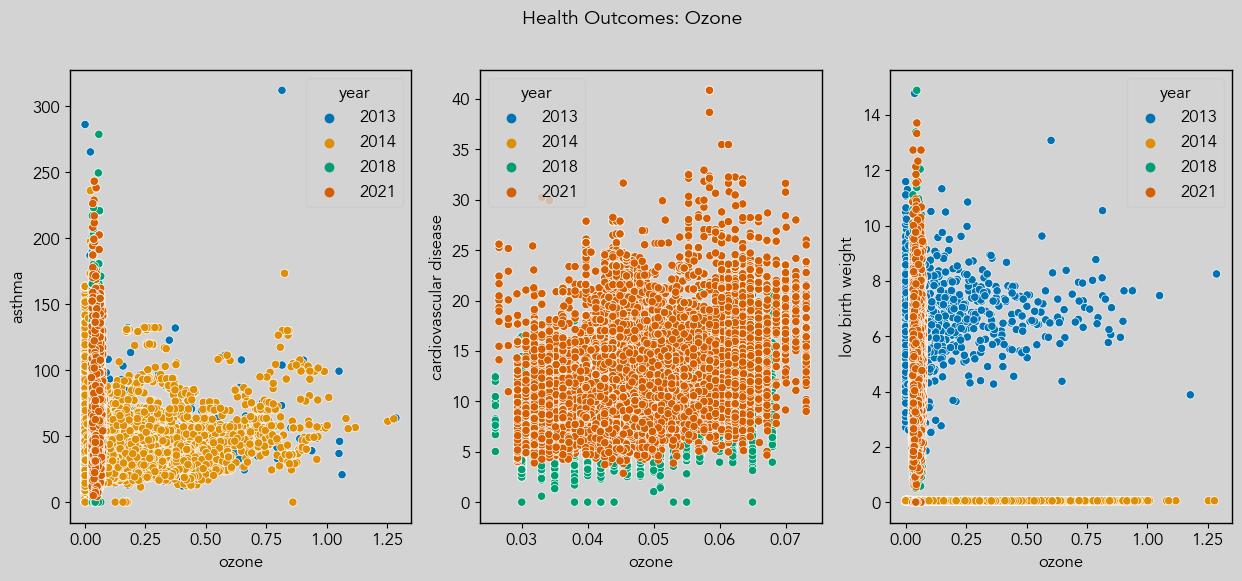

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=False, sharex = False,  figsize=(15, 6))

fig.suptitle('Health Outcomes: Ozone')

x = 'ozone'
y1 = 'asthma'
y2 = 'cardiovascular disease'
y3 = 'low birth weight'
sns.scatterplot(data = df, 
        x = x, 
        y = y1, 
        ax = ax[0], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = df, 
        x = x, 
        y = y2, 
        ax = ax[1], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = df, 
        x = x, 
        y = y3, 
        ax = ax[2], 
        palette = 'colorblind',
        hue = 'year'
        );

> ## * Reporting for `OZONE` changed between 2 and 3, will have to look at data dictionary to asses change. 
> ## * `birthweight` and `asthma` reporting also seems to have changed 

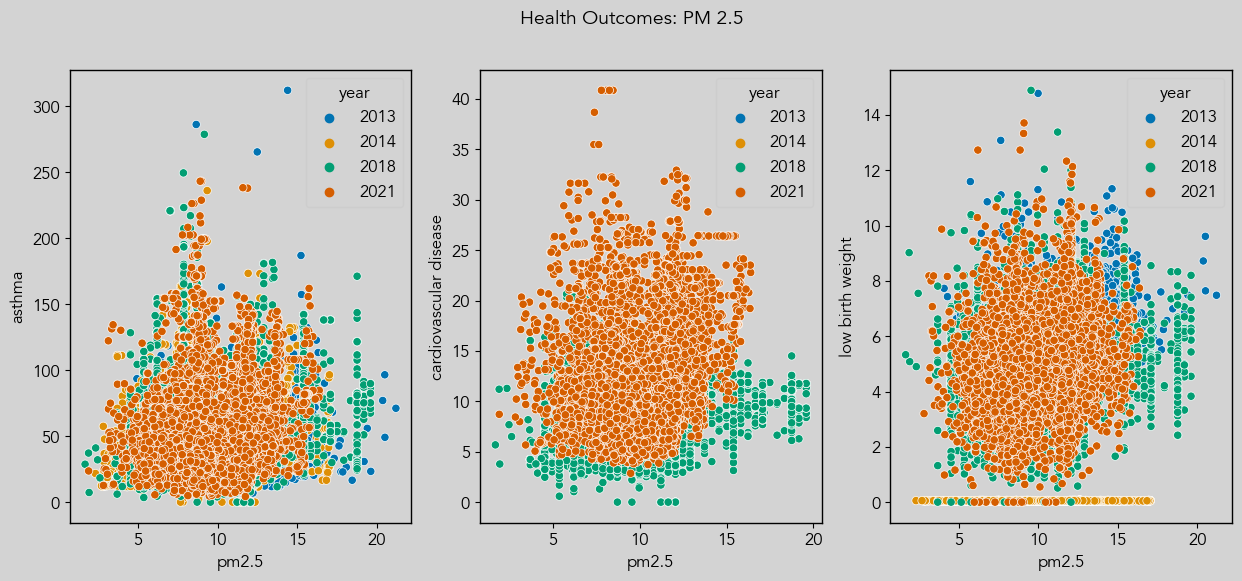

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=False, sharex = False,  figsize=(15, 6))

fig.suptitle('Health Outcomes: PM 2.5')

x = 'pm2.5'
y1 = 'asthma'
y2 = 'cardiovascular disease'
y3 = 'low birth weight'
sns.scatterplot(data = df, 
        x = x, 
        y = y1, 
        ax = ax[0], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = df, 
        x = x, 
        y = y2, 
        ax = ax[1], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = df, 
        x = x, 
        y = y3, 
        ax = ax[2], 
        palette = 'colorblind',
        hue = 'year'
        );

> ## * `birthweigh` looks weird again for year `2014`, `es2`

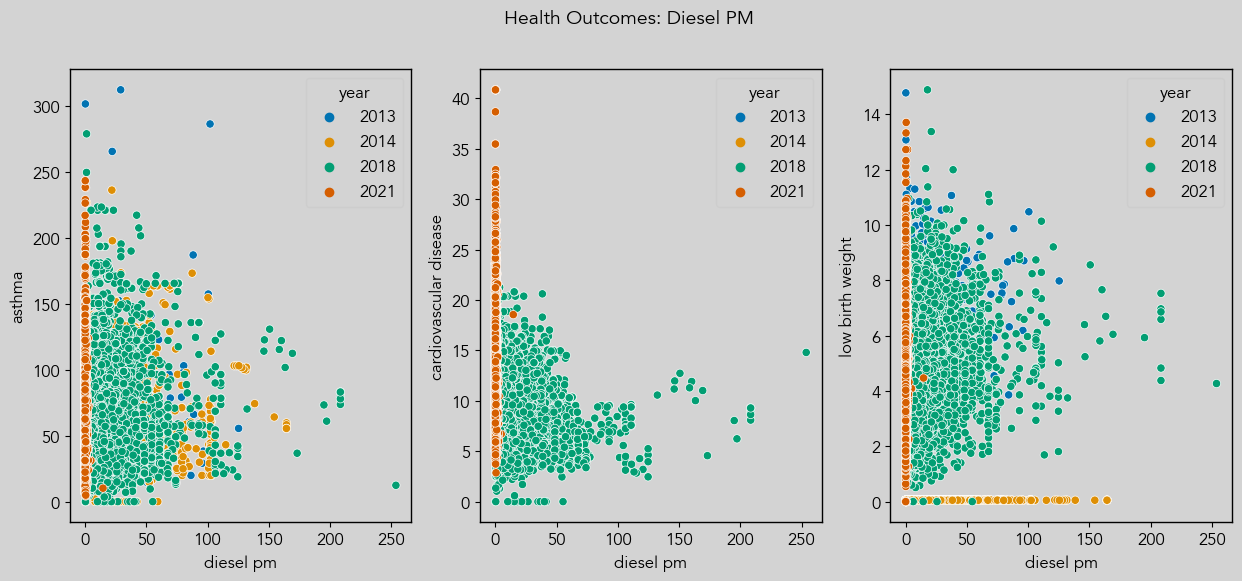

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=False, sharex = False,  figsize=(15, 6))

fig.suptitle('Health Outcomes: Diesel PM ')

x = 'diesel pm'
y1 = 'asthma'
y2 = 'cardiovascular disease'
y3 = 'low birth weight'
sns.scatterplot(data = df, 
        x = x, 
        y = y1, 
        ax = ax[0], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = df, 
        x = x, 
        y = y2, 
        ax = ax[1], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = df, 
        x = x, 
        y = y3, 
        ax = ax[2], 
        palette = 'colorblind',
        hue = 'year'
        );

> ## * `diesel pm` reporting changed in 2021
> ## * `low birth weight` different in 2014

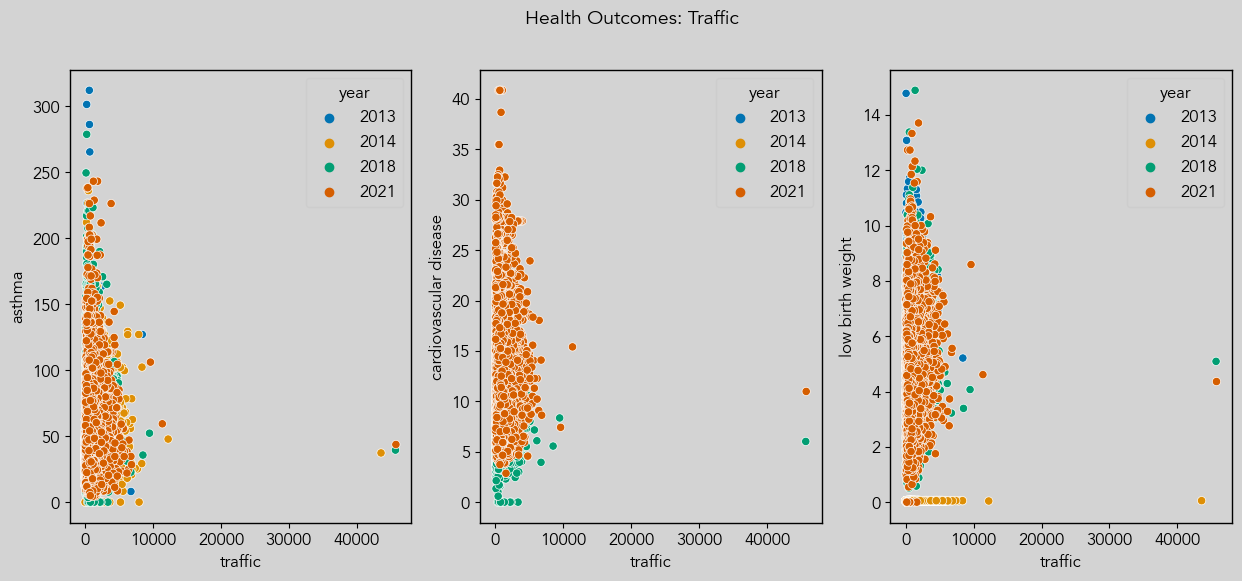

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=False, sharex = False,  figsize=(15, 6))

fig.suptitle('Health Outcomes: Traffic')

x = 'traffic'
y1 = 'asthma'
y2 = 'cardiovascular disease'
y3 = 'low birth weight'
sns.scatterplot(data = df, 
        x = x, 
        y = y1, 
        ax = ax[0], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = df, 
        x = x, 
        y = y2, 
        ax = ax[1], 
        palette = 'colorblind',
        hue = 'year'
        );
sns.scatterplot(data = df, 
        x = x, 
        y = y3, 
        ax = ax[2], 
        palette = 'colorblind',
        hue = 'year'
        );

# drop these `traffic` outliers ? 

In [41]:
df['year'].describe()


count    25874.000000
mean      2017.347608
std          3.007917
min       2013.000000
25%       2014.000000
50%       2018.000000
75%       2021.000000
max       2021.000000
Name: year, dtype: float64

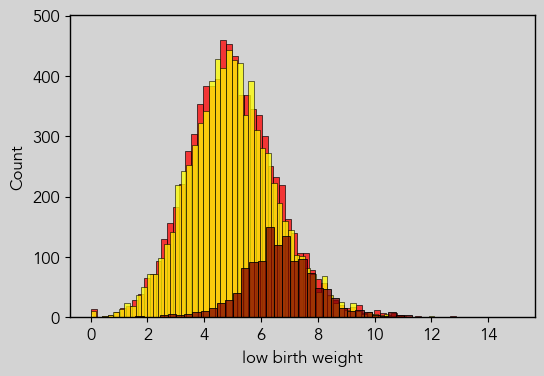

In [55]:
sns.histplot(data = df4, 
        x = df4['low birth weight'], 
        color = 'red',
        );
sns.histplot(data = df2, 
        x = df2['low birth weight'], 
        color = 'pink',
        );
sns.histplot(data = df3, 
        x = df3['low birth weight'], 
        color = 'yellow',
        );
sns.histplot(data = df1, 
        x = df1['low birth weight'], 
        color = 'maroon',
        );

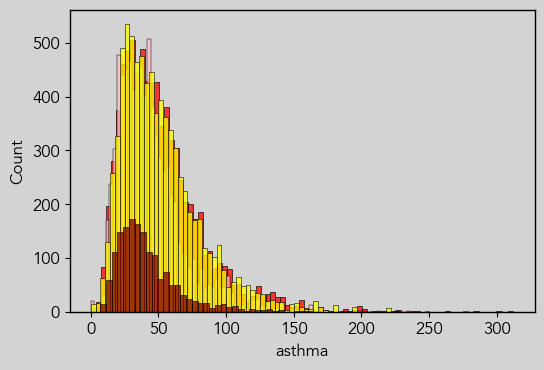

In [56]:
sns.histplot(data = df4, 
        x = df4['asthma'], 
        color = 'red',
        );
sns.histplot(data = df2, 
        x = df2['asthma'], 
        color = 'pink',
        );
sns.histplot(data = df3, 
        x = df3['asthma'], 
        color = 'yellow',
        );
sns.histplot(data = df1, 
        x = df1['asthma'], 
        color = 'maroon',
        );

### No cardiovascular available for 1, 2; should compare incidence increase to national, or at least regional, trends. 

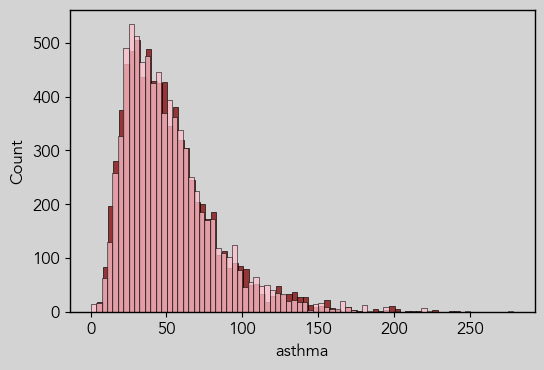

In [59]:
sns.histplot(data = df4, 
        x = df4['asthma'], 
        color = 'maroon',
        );
sns.histplot(data = df3, 
        x = df3['asthma'], 
        color = 'pink',
        );

---
---
---
# DT - Looking at the health distros

---
### heart attack distributions

DT

4/17

Something changed here. California hospitals started seeing a lot more ami emergency room visits. These are only a few years apart --- this can't be from aging population... (right?). The maroon set above both has higher values around the mean, but also has a thicker tail. the CES 4 2015--2017 period saw more tracts (higher "y") see high AMI visits (higher "x") for a larger total number of visits (width of distribution, "area under the curve").

CAES 4 cardiovascular disease:
>Spatially modeled, age-adjusted rate of emergency department (ED)
visits for AMI per 10,000 (averaged over 2015-2017).

CAES 3  cardiovascular disease:
>Spatially modeled, age-adjusted rate of emergency department (ED)
visits for AMI per 10,000 (averaged over 2011-2013).

It's not covid related. These integration periods both predate covid-19.

I don't think it's hyperbole to say that the difference in these distributions is enormous. What the hell happened in California in the mid 2010s? Is this from the wildfire increase?

In [31]:
df4[x].sum()/df3[x].sum()

1.6205086602818009

Plot normalized distributions for shape.

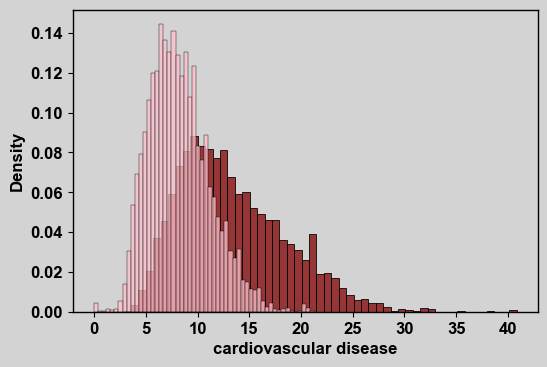

In [26]:
sns.histplot(data = df4, 
        x = x, 
        color = 'maroon',
        stat = "density"
        );
sns.histplot(data = df3, 
        x = x, 
        color = 'pink',
        stat = 'density'
        );

The original data is normalized, it's per 10000 people. This is not due to increasing population.

what changes could have happened?

- ER visit availability. New hospitals  (but in every tract?
- actual increased instances of AMI caused by
    - aging population (but a doubling of cases in 5 years? 
    - environmental hazards from industry, wildfires, other
- something legal in treatment or reporting


### asthrma

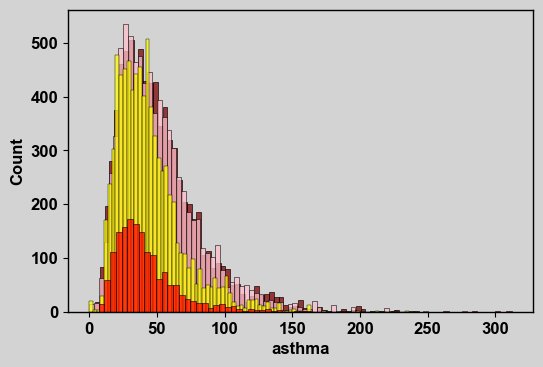

In [32]:
#copying the asthma histos above

x = 'asthma'

sns.histplot(data = df4, 
        x = x, 
        color = 'maroon',
        );
sns.histplot(data = df3, 
        x = x, 
        color = 'pink',
        );
sns.histplot(data = df2, 
        x = x, 
        color = 'yellow',
        );
sns.histplot(data = df1, 
        x = x, 
        color = 'red',
        );

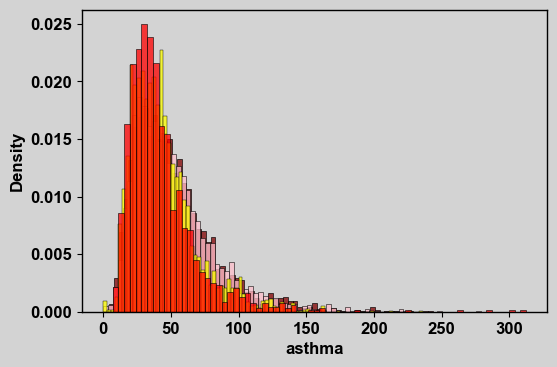

In [33]:
# plot with normalization. The first CAES (df1) data has much fewer entries, so better to just compare shapes.
x = 'asthma'

sns.histplot(data = df4, 
        x = x, 
        color = 'maroon',
        stat='density'
        );
sns.histplot(data = df3, 
        x = x, 
        color = 'pink',
        stat='density'
        );
sns.histplot(data = df2, 
        x = x, 
        color = 'yellow',
        stat='density'
        );
sns.histplot(data = df1, 
        x = x, 
        color = 'red',
        stat='density'
        );

could be argued that there's an increase (60s - 70s counts) but these are pretty much the same plots.

### birth weight

This is another striking one.

In [34]:
# copy histogram from above

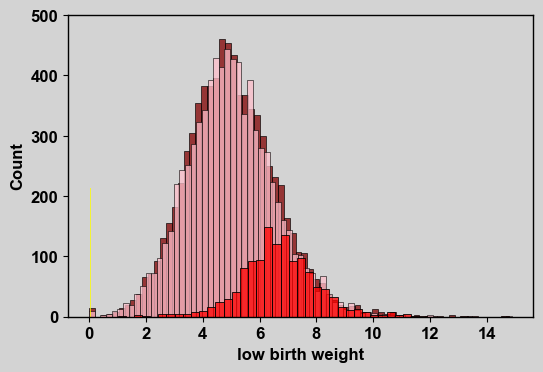

In [35]:
x = 'low birth weight'

sns.histplot(data = df4, 
        x = x, 
        color = 'maroon',
        );
sns.histplot(data = df3, 
        x = x, 
        color = 'pink',
        );
sns.histplot(data = df2, 
        x = x, 
        color = 'yellow',
        );
sns.histplot(data = df1, 
        x = x, 
        color = 'red',
        );

In [38]:
# the df2 data is as a fraction, rather than percent. Replot it with that x100.
df2['low birth weight percent'] = df2['low birth weight']*100

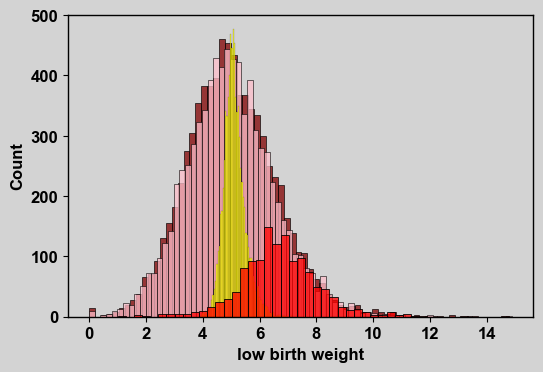

In [39]:
x = 'low birth weight'

sns.histplot(data = df4, 
        x = x, 
        color = 'maroon',
        );
sns.histplot(data = df3, 
        x = x, 
        color = 'pink',
        );
sns.histplot(data = df2, 
        x = x+' percent', 
        color = 'yellow',
        );
sns.histplot(data = df1, 
        x = x, 
        color = 'red',
        );

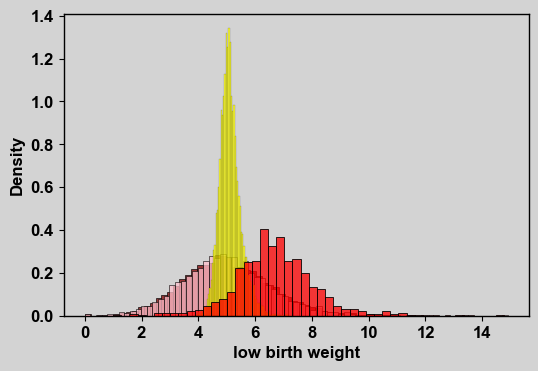

In [40]:
#the same with normalized distributions:


x = 'low birth weight'

sns.histplot(data = df4, 
        x = x, 
        color = 'maroon',
             stat = 'density'
        );
sns.histplot(data = df3, 
        x = x, 
        color = 'pink',
             stat = 'density'
        );
sns.histplot(data = df2, 
        x = x+' percent', 
        color = 'yellow',
             stat = 'density'
        );
sns.histplot(data = df1, 
        x = x, 
        color = 'red',
             stat = 'density'
        );

(It may be more appropriate to compare CAES 2 with 3 & 4 in the first plot: the main difference between CAES 2 (yellow) and 3&4 is the variance in the 2 set. Comparing CAES 1 (red) with 3&4 is more appropriate in the second, normalized plots, where the spread is about the same but the mean is much higher.)

What is going ON with CAES 1 and 2?
All of these define low birth weight as 2,500 grams.
The CAES 2 report 

CAES 1: (red)
> Percent low birth weight (averaged over 2007-2011).

CAES 2: (yellow)
> Percent low birth weight, spatially modeled (averaged over 2006-2009).
 - The spatial modeling might simply not feature the same variability as real life.

CAES 3: (pink)
>Percent low birth weight, (averaged over 2006-2012)

CAES 4: (maroon)
>Percent low birth weight, (averaged over 2009-2015)

---
---
---